In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

import pandas as pd
sns.set_theme(rc={"figure.dpi":100, 'savefig.dpi':6000})
plt.style.use('seaborn-whitegrid')

from plot_utils import load_data, plot, create_plot_grid, data_dict


/var/folders/nt/p064gwps3tj3v7lp7myqv9n00000gn/T/ipykernel_72132/3599221589.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
# seeds
seeds = [224, 389, 405, 432, 521, 580, 639, 673, 803, 869]
# envs
envs = ["Acrobot-v1", "CartPole-v1", "MountainCar-v0", "MountainCarContinuous-v0", "Pendulum-v1", "LunarLander-v2"]
# methods
methods = ["binQ", "CAT-RL", "TileCoding"]
# load the data

data = data_dict(methods, envs, seeds)

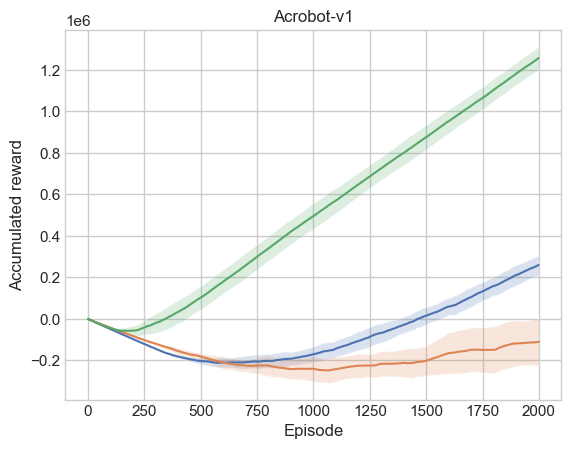

In [3]:
plot(data, methods, "Acrobot-v1", seeds, "accumulated reward")

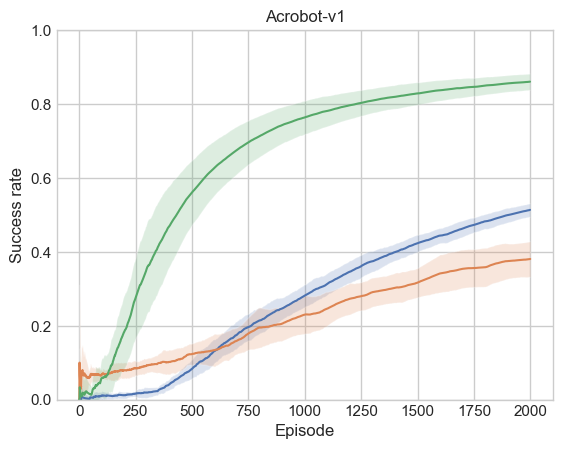

In [4]:
plot(data, methods, "Acrobot-v1", seeds, "success rate")

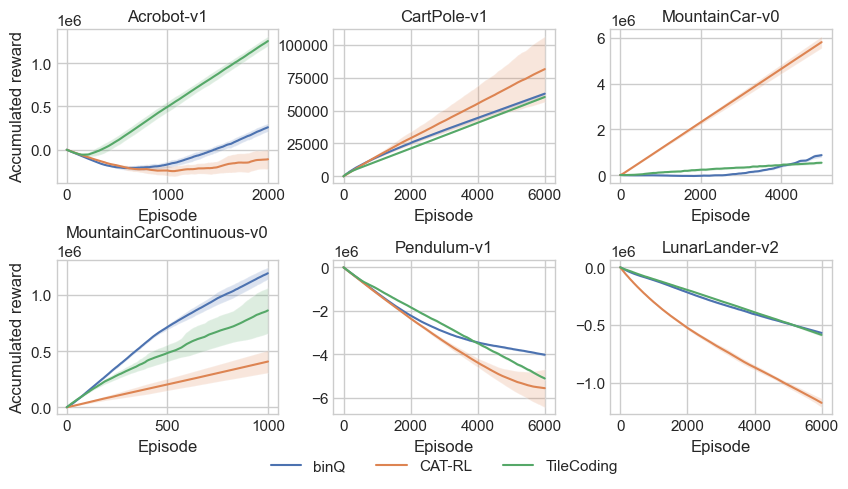

In [5]:
create_plot_grid(data, methods, envs, seeds, "accumulated reward")


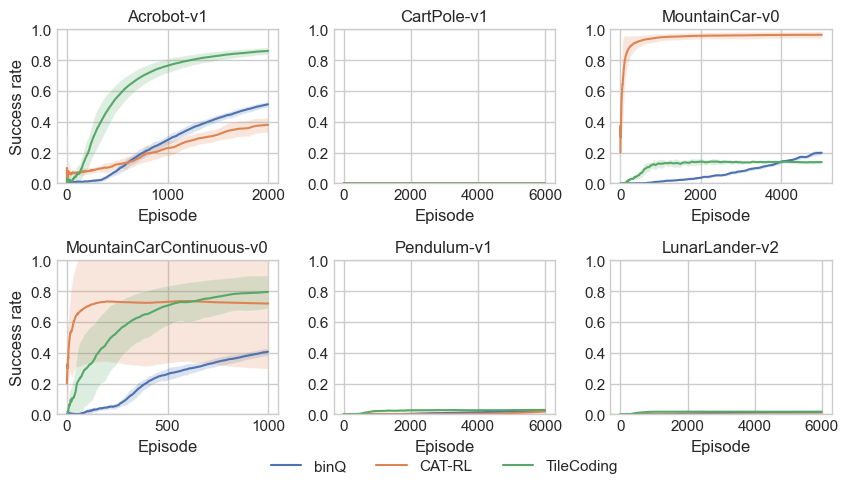

In [6]:
create_plot_grid(data, methods, envs, seeds, "success rate")

In [7]:
#get data for after training
methods = ["CAT-RL"]
data_after_train = data_dict(methods, envs, seeds, folder="results-after-train")


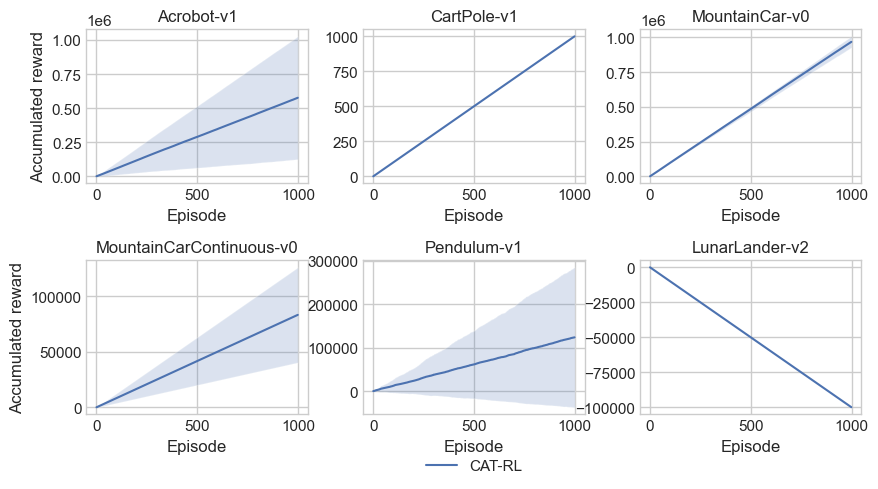

In [8]:
create_plot_grid(data_after_train, methods, envs, seeds, "accumulated reward", save_name="after_train")

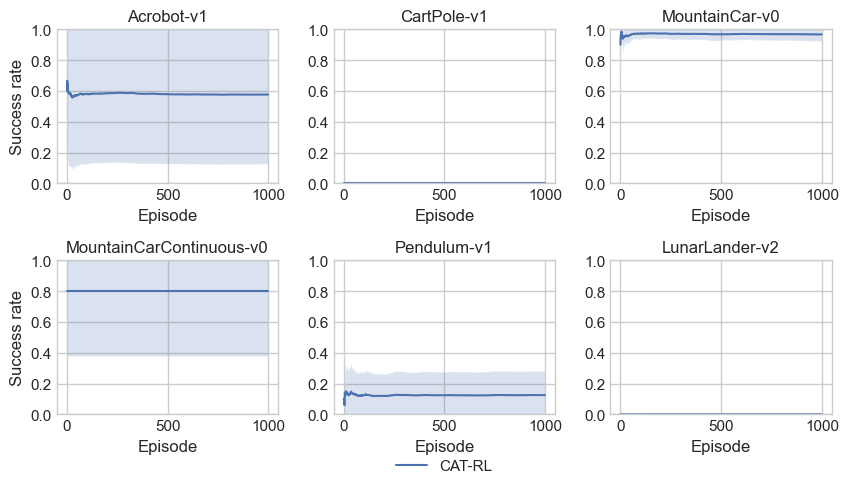

In [9]:
create_plot_grid(data_after_train, methods, envs, seeds, "success rate", save_name="after_train")


In [10]:
import glob


def load_data(method, env, bin, folder='k_bins_results'):
    path = f"{folder}-{bin}/{method}/{env}/*"
    for name in glob.glob(path):
        # if the file does not contain info in name
        if "info" not in name:
            data = pd.read_csv(name)
            # add column for accumulated reward
            data['accumulated reward'] = data['reward'].cumsum()

            # add column for success rate
            data['success rate'] = data['success'].cumsum() / (data.index + 1)

            return data
        
# load data for k bins
methods = ["TileCoding", "CAT-RL", "binQ"]
envs = ["MountainCarContinuous-v0", "Pendulum-v1"]
bins = [2, 4, 8, 10, 25, 50]
dataKBins = {}
for method in methods:
    dataKBins[method] = {}
    for env in envs:
        dataKBins[method][env] = {}
        for bin in bins:
            dataKBins[method][env][bin] = load_data(method, env, bin, folder='k_bins_results')

In [11]:
# plot each bin for each method in each env
def plot_k_bins(method, env, bins, ax):

    for bin in bins:
        plot_data = dataKBins[method][env][bin]

        plt.plot(plot_data["episode"], plot_data["accumulated reward"], label=f"{bin} bins")

        # add legend
        plt.legend()
        plt.xlabel("Episode")
        plt.ylabel(ax[0].upper() + ax[1:])
        plt.title(f"{env}-{method}")
        # if success rate, set y limit to [0,1]
        if ax == "success rate":
            plt.ylim(0, 1)

    plt.show()

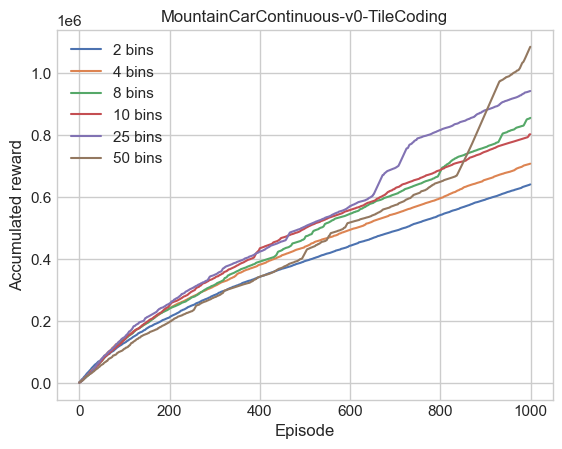

In [12]:
plot_k_bins(methods[0], envs[0], bins, "accumulated reward")

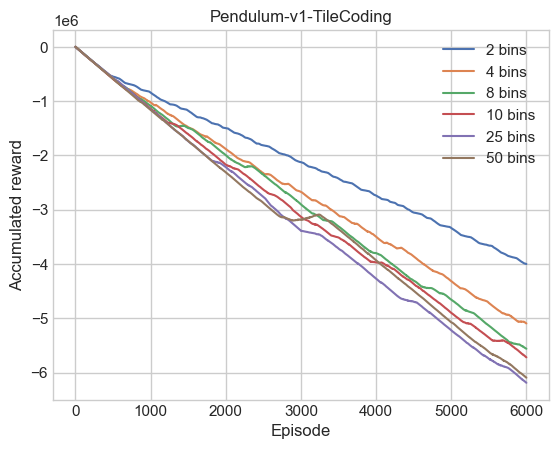

In [13]:
plot_k_bins(methods[0], envs[1], bins, "accumulated reward")

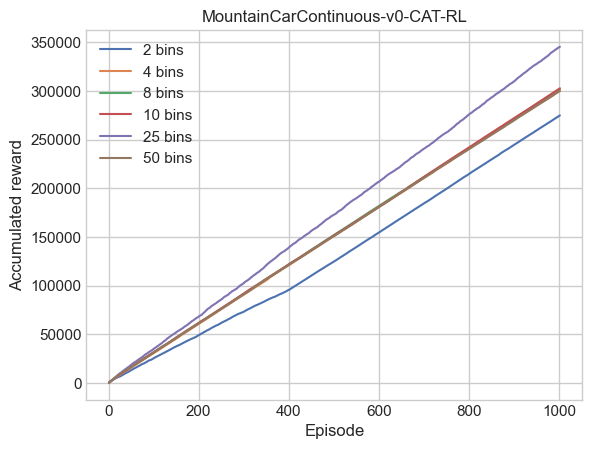

In [14]:
plot_k_bins(methods[1], envs[0], bins, "accumulated reward")


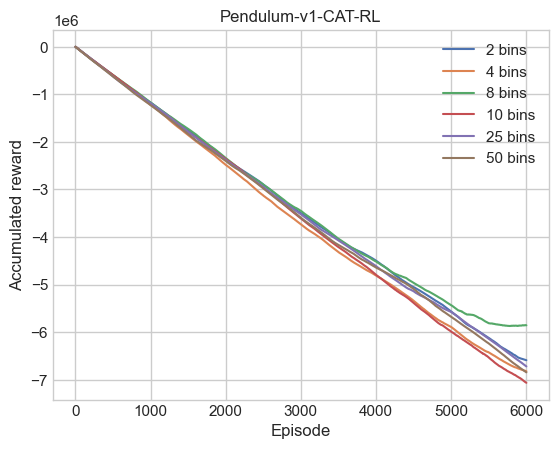

In [15]:
plot_k_bins(methods[1], envs[1], bins, "accumulated reward")


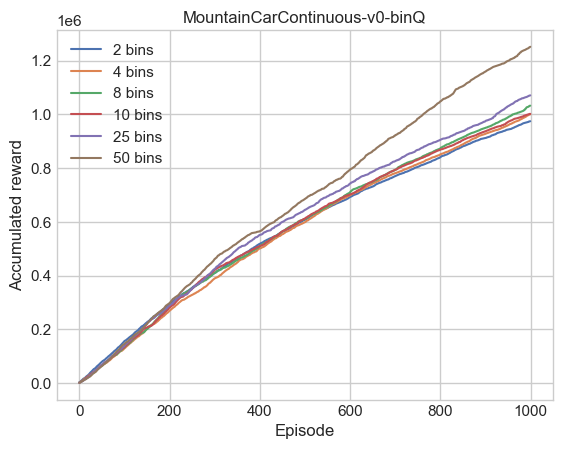

In [16]:
plot_k_bins(methods[2], envs[0], bins, "accumulated reward")

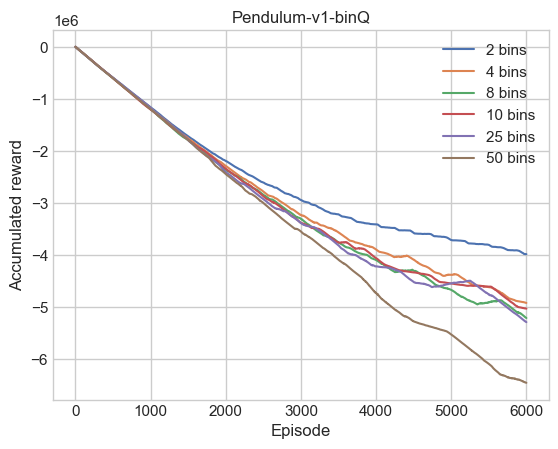

In [17]:
plot_k_bins(methods[2], envs[1], bins, "accumulated reward")